# This notebook shows how to do regression analysis using Iris dataset

In [57]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
np.random.seed(42)

### Load Iris dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names
X.shape, Y.shape, class_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [4]:
iris_df = pd.DataFrame(X,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = Y
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 432x288 with 0 Axes>

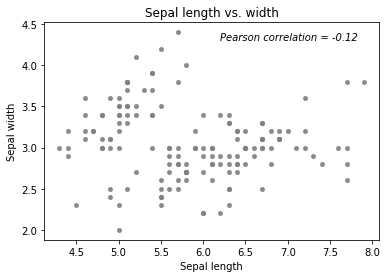

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], color="gray", alpha=.8, lw=2, s=10)
plt.title('Sepal length vs. width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pearson, _ = pearsonr(iris_df['sepal_length'], iris_df['sepal_width'])
pearson_text = 'Pearson correlation = {0:.2f}'.format(pearson)
plt.text(6.2, 4.3, pearson_text, style='italic')

plt.figure()

<Figure size 432x288 with 0 Axes>

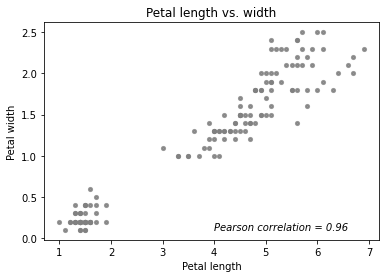

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], color="gray", alpha=.8, lw=2, s=10)
plt.title('Petal length vs. width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

pearson, _ = pearsonr(iris_df['petal_length'], iris_df['petal_width'])
pearson_text = 'Pearson correlation = {0:.2f}'.format(pearson)
plt.text(4, .1, pearson_text, style='italic')

plt.figure()

### Draw quick best fit lines through the scatterplots

<Figure size 432x288 with 0 Axes>

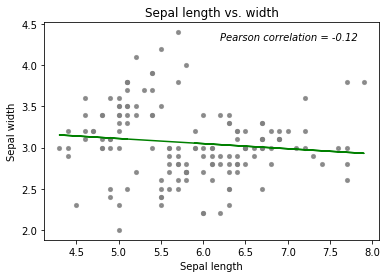

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], color="gray", alpha=.8, lw=2, s=10)
plt.title('Sepal length vs. width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pearson, _ = pearsonr(iris_df['sepal_length'], iris_df['sepal_width'])
pearson_text = 'Pearson correlation = {0:.2f}'.format(pearson)
plt.text(6.2, 4.3, pearson_text, style='italic')

m, b = np.polyfit(iris_df['sepal_length'], iris_df['sepal_width'], 1)
plt.plot(iris_df['sepal_length'], m*iris_df['sepal_length'] + b, color="green")

plt.figure()

<Figure size 432x288 with 0 Axes>

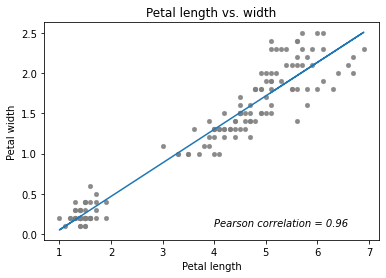

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], color="gray", alpha=.8, lw=2, s=10)
plt.title('Petal length vs. width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

pearson, _ = pearsonr(iris_df['petal_length'], iris_df['petal_width'])
pearson_text = 'Pearson correlation = {0:.2f}'.format(pearson)
plt.text(4, .1, pearson_text, style='italic')

m, b = np.polyfit(iris_df['petal_length'], iris_df['petal_width'], 1)
plt.plot(iris_df['petal_length'], m*iris_df['petal_length'] + b)

plt.figure()

## Logistic regression using scikitlearn

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

### Predicting Iris class based on sepal features

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [59]:
model = LogisticRegression(penalty="none")  #penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
model.fit(X_train[:,:2], Y_train)

LogisticRegression(penalty='none')

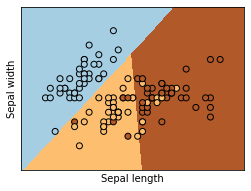

In [60]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [61]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test[:,:2])

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [[-104.68   95.33]
 [  51.22  -47.77]
 [  53.47  -47.57]]
Mean squared error: 0.27
Coefficient of determination: 0.51


Confusion matrix, without normalization
[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.5  0.5 ]]


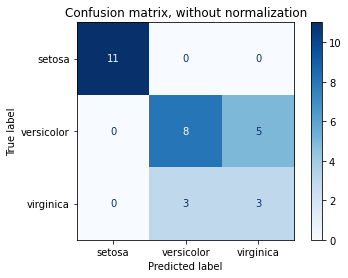

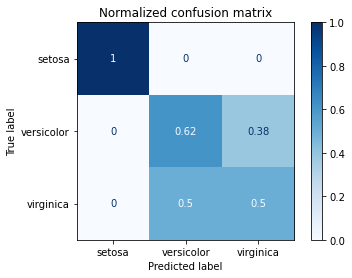

In [62]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test[:,:2], Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Predicting Iris class based on all features

In [55]:
model = LogisticRegression(penalty="none")
model.fit(X_train, Y_train)

# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [[  7.51562531  17.16411267 -24.32770364 -11.7030546 ]
 [ -2.4394564   -5.67923916   7.61178542  -2.24184645]
 [ -5.0761689  -11.4848735   16.71591822  13.94490105]]
Mean squared error: 0.00
Coefficient of determination: 1.00


Confusion matrix, without normalization
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


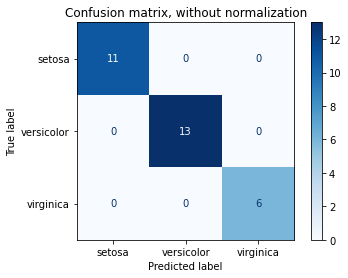

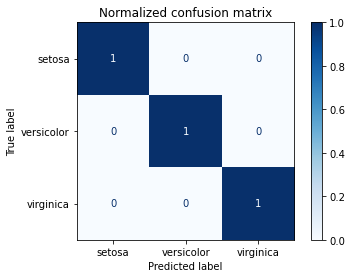

In [58]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Predicting Iris class based on sepal features using regularization

In [68]:
model = LogisticRegression(penalty="l2")
model.fit(X_train[:,:2], Y_train)

LogisticRegression()

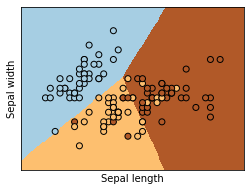

In [64]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [65]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test[:,:2])

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [[-2.55  2.16]
 [ 0.45 -1.46]
 [ 2.1  -0.7 ]]
Mean squared error: 0.27
Coefficient of determination: 0.51
